<a href="https://colab.research.google.com/github/SenaEnana/Laravel-Backend-App/blob/main/bigDataAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")

In [11]:
# View the first few rows
print(df.head())

# Get information about data types and dimensions
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Get descriptive statistics
print(df.describe())


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [12]:
# Remove rows with missing values in a specific column (e.g., 'revenue')
df = df.dropna(subset=['revenue'])

# Impute missing values with the mean (for numerical columns)
df['budget'] = df['budget'].fillna(df['budget'].mean())


In [13]:
# Convert 'budget' to float
df['budget'] = df['budget'].astype(float)


In [14]:
# Fix typos or inconsistencies in specific columns
df['genres'] = df['genres'].str.lower()  # Convert genres to lowercase


In [15]:
# Select relevant columns
df_selected = df[['genres', 'vote_average', 'release_date', 'revenue']]

# Create a new feature (e.g., release year)
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Group data by genre and calculate summary statistics
genre_stats = df.groupby('genres')['revenue'].mean()


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features (e.g., 'budget' and 'revenue')
scaler = MinMaxScaler()
df[['budget', 'revenue']] = scaler.fit_transform(df[['budget', 'revenue']])


                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean    66064.177434      0.646441      0.034413      0.014317    102.070863   
std     92130.136561      1.000185      0.072737      0.042065     31.381405   
min         5.000000      0.000065      0.000000      0.000000      0.000000   
25%     10596.250000      0.207583      0.000000      0.000000     90.000000   
50%     20669.000000      0.383856      0.000000      0.000000     99.000000   
75%     75610.000000      0.713817      0.035294      0.008628    111.000000   
max    417859.000000     32.985763      1.000000      1.000000    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2005.905761  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     16.7715

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>],
       [<Axes: title={'center': 'revenue_adj'}>, <Axes: >, <Axes: >]],
      dtype=object)

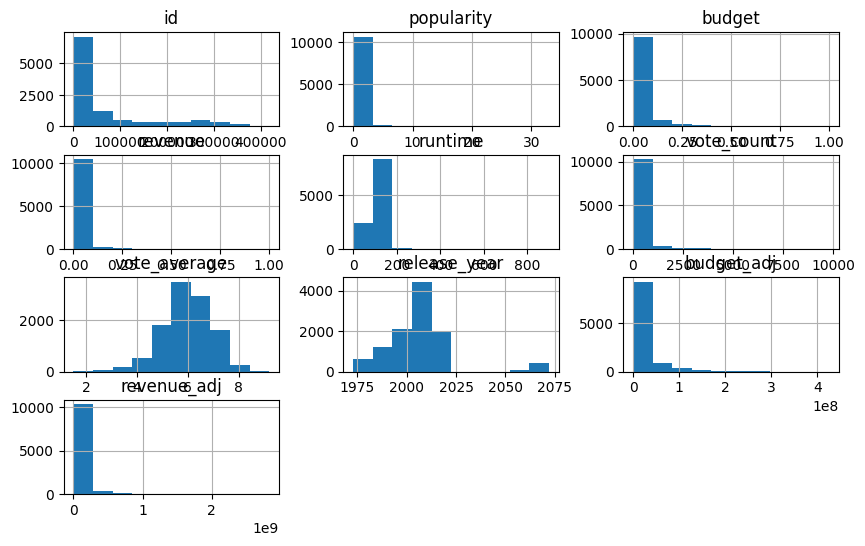

In [17]:
# Check for remaining errors or inconsistencies using descriptive statistics and visualizations
print(df.describe())
df.hist(figsize=(10, 6))  # Visualize distributions
